# Sample Python code to analyze GEOS-Chem data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import xarray as xr
import cartopy.crs as ccrs

## GEOS-Chem NetCDF diagnostics

In [2]:
ds = xr.open_dataset("/home/ubuntu/geosfp_4x5_standard/"
                     "GEOSChem.inst.20130701_backup.nc4")
ds

<xarray.Dataset>
Dimensions:         (ilev: 73, lat: 46, lev: 72, lon: 72, time: 1)
Coordinates:
  * time            (time) datetime64[ns] 2013-07-01T00:20:00
  * lev             (lev) float64 0.9925 0.9775 0.9625 0.9475 0.9325 0.9175 ...
  * ilev            (ilev) float64 1.0 0.985 0.97 0.955 0.94 0.925 0.91 ...
  * lat             (lat) float64 -89.0 -86.0 -82.0 -78.0 -74.0 -70.0 -66.0 ...
  * lon             (lon) float64 -180.0 -175.0 -170.0 -165.0 -160.0 -155.0 ...
Data variables:
    hyam            (lev) float64 ...
    hybm            (lev) float64 ...
    hyai            (ilev) float64 ...
    hybi            (ilev) float64 ...
    P0              float64 ...
    AREA            (lat, lon) float32 ...
    SpeciesConc_CO  (time, lev, lat, lon) float32 ...
    SpeciesConc_O3  (time, lev, lat, lon) float32 ...
    SpeciesConc_NO  (time, lev, lat, lon) float32 ...
Attributes:
    title:         GEOS-Chem diagnostic collection: inst
    history:       
    format:        not found


In [3]:
ds['SpeciesConc_O3']

<xarray.DataArray 'SpeciesConc_O3' (time: 1, lev: 72, lat: 46, lon: 72)>
[238464 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2013-07-01T00:20:00
  * lev      (lev) float64 0.9925 0.9775 0.9625 0.9475 0.9325 0.9175 0.9025 ...
  * lat      (lat) float64 -89.0 -86.0 -82.0 -78.0 -74.0 -70.0 -66.0 -62.0 ...
  * lon      (lon) float64 -180.0 -175.0 -170.0 -165.0 -160.0 -155.0 -150.0 ...
Attributes:
    long_name:         Dry mixing ratio of species O3
    units:             mol mol-1 dry
    averaging_method:  instantaneous

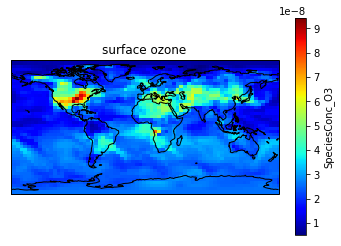

In [4]:
ax = plt.axes(projection=ccrs.PlateCarree())
ds['SpeciesConc_O3'][0,0].plot(cmap='jet', ax=ax)
ax.coastlines()
plt.title('surface ozone');

## GEOS-FP metfield

In [5]:
ds_met = xr.open_dataset("/home/ubuntu/gcdata/ExtData/GEOS_4x5/GEOS_FP/"
                         "2013/07/GEOSFP.20130701.I3.4x5.nc")
ds_met

<xarray.Dataset>
Dimensions:  (lat: 46, lev: 72, lon: 72, time: 8)
Coordinates:
  * time     (time) datetime64[ns] 2013-07-01 2013-07-01T03:00:00 ...
  * lev      (lev) float32 1.0 2.0 3.0 4.0 5.0 6.0 7.0 8.0 9.0 10.0 11.0 ...
  * lat      (lat) float32 -90.0 -86.0 -82.0 -78.0 -74.0 -70.0 -66.0 -62.0 ...
  * lon      (lon) float32 -180.0 -175.0 -170.0 -165.0 -160.0 -155.0 -150.0 ...
Data variables:
    PS       (time, lat, lon) float32 ...
    PV       (time, lev, lat, lon) float32 ...
    QV       (time, lev, lat, lon) float32 ...
    T        (time, lev, lat, lon) float32 ...
Attributes:
    Title:                 GEOS-FP instantaneous 3-hour parameters (I3), proc...
    Contact:               GEOS-Chem Support Team (geos-chem-support@as.harva...
    References:            www.geos-chem.org; wiki.geos-chem.org
    Filename:              GEOSFP.20130701.I3.4x5.nc
    History:               File generated on: 2013/10/24 12:26:39 GMT-0300
    ProductionDateTime:    File generated on: 20

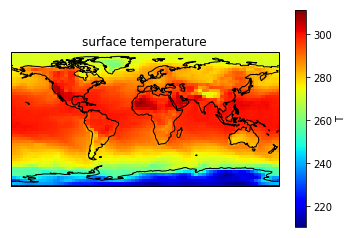

In [6]:
ax = plt.axes(projection=ccrs.PlateCarree())
ds_met['T'][0,0].plot(cmap='jet', ax=ax)
ax.coastlines()
plt.title('surface temperature');